<a href="https://colab.research.google.com/github/hc2twv/UPSE_OP/blob/main/ListaVecinosRedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explicación del Código

Generación de Datos Ficticios: generate_fake_twitter_data crea una lista de usuarios ficticios y una lista de interacciones aleatorias entre ellos.

Construcción del Grafo: build_graph construye un grafo de NetworkX a partir de los usuarios y las interacciones.

Aplicación del Algoritmo de Listas Vecinas:
jaccard_similarity calcula la similitud de Jaccard entre dos listas de vecinos.
neighbor_list_algorithm aplica el algoritmo de listas vecinas para identificar comunidades. Calcula la similitud de Jaccard para cada par de nodos y organiza nodos en comunidades basándose en sus listas de vecinos.

Análisis de Resultados: analyze_communities organiza los usuarios en sus respectivas comunidades.

Visualización de Resultados: visualize_communities visualiza las comunidades en un grafo utilizando Matplotlib.

Generación de Informe: write_report escribe un informe con los resultados del análisis.

Comunidad 0: ['user_22', 'user_7', 'user_32', 'user_34', 'user_26', 'user_37', 'user_30', 'user_19', 'user_12', 'user_42', 'user_8', 'user_9', 'user_49', 'user_23', 'user_44', 'user_1', 'user_35', 'user_28', 'user_17', 'user_48', 'user_2', 'user_45', 'user_6', 'user_27', 'user_33', 'user_15', 'user_29', 'user_36', 'user_5', 'user_47', 'user_0', 'user_24', 'user_18', 'user_38', 'user_20', 'user_39', 'user_11', 'user_31', 'user_21', 'user_16', 'user_25', 'user_14', 'user_43', 'user_13', 'user_4', 'user_46', 'user_40', 'user_10', 'user_3', 'user_41']
Comunidad 1: ['user_27', 'user_22', 'user_7', 'user_33', 'user_15', 'user_34', 'user_26', 'user_37', 'user_30', 'user_36', 'user_12', 'user_5', 'user_0', 'user_8', 'user_49', 'user_38', 'user_1', 'user_44', 'user_20', 'user_31', 'user_21', 'user_16', 'user_25', 'user_14', 'user_43', 'user_28', 'user_17', 'user_4', 'user_46', 'user_48', 'user_2', 'user_45', 'user_6', 'user_40', 'user_3', 'user_10', 'user_41']
Comunidad 2: ['user_4', 'user_27',

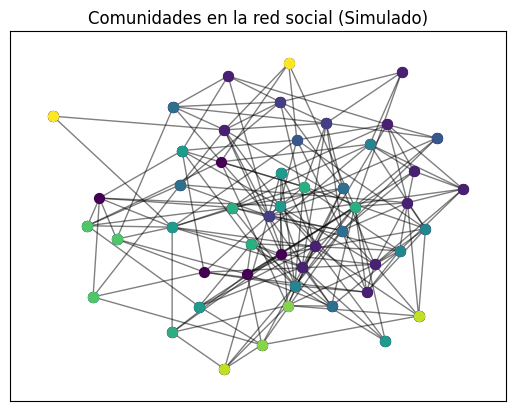

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
import numpy as np
from itertools import combinations

# Generación de datos ficticios
def generate_fake_twitter_data(num_users=50, num_interactions=200):
    users = [f'user_{i}' for i in range(num_users)]
    interactions = []

    for _ in range(num_interactions):
        user1, user2 = random.sample(users, 2)
        interactions.append((user1, user2))

    return users, interactions

users, interactions = generate_fake_twitter_data()

# Construcción del grafo
def build_graph(users, interactions):
    G = nx.Graph()

    for user in users:
        G.add_node(user)

    for user1, user2 in interactions:
        if G.has_edge(user1, user2):
            G[user1][user2]['weight'] += 1
        else:
            G.add_edge(user1, user2, weight=1)

    return G

graph = build_graph(users, interactions)

# Aplicación del algoritmo de listas vecinas
def jaccard_similarity(list1, list2):
    intersection = len(set(list1) & set(list2))
    union = len(set(list1) | set(list2))
    return intersection / union if union != 0 else 0

def neighbor_list_algorithm(G):
    nodes = list(G.nodes())
    neighbor_lists = {node: list(G.neighbors(node)) for node in nodes}
    similarities = {}

    for node1, node2 in combinations(nodes, 2):
        sim = jaccard_similarity(neighbor_lists[node1], neighbor_lists[node2])
        if sim > 0:
            similarities[(node1, node2)] = sim

    sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    communities = []
    added_nodes = set()

    for (node1, node2), sim in sorted_similarities:
        if node1 not in added_nodes and node2 not in added_nodes:
            communities.append({node1, node2})
            added_nodes.update({node1, node2})
        else:
            merged = False
            for community in communities:
                if node1 in community or node2 in community:
                    community.update({node1, node2})
                    added_nodes.update({node1, node2})
                    merged = True
                    break
            if not merged:
                communities.append({node1, node2})

    # More aggressive merging using nested loop
    merged_communities = []
    for i in range(len(communities)):
        merged = False
        for j in range(i + 1, len(communities)):
            if not communities[i].isdisjoint(communities[j]):
                merged_communities.append(communities[i] | communities[j])
                merged = True
                break
        if not merged:
            merged_communities.append(communities[i])

    return merged_communities

communities = neighbor_list_algorithm(graph)

# Análisis de resultados
def analyze_communities(communities):
    community_dict = {}
    for i, community in enumerate(communities):
        community_dict[i] = list(community)
    return community_dict

community_dict = analyze_communities(communities)

for community, users in community_dict.items():
    print(f'Comunidad {community}: {users}')

# Visualización de resultados
def visualize_communities(graph, communities):
    pos = nx.spring_layout(graph)
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(communities)))
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(graph, pos, nodelist=community, node_color=[color], node_size=50)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.title("Comunidades en la red social (Simulado)")
    plt.show()

visualize_communities(graph, communities)

# Generación de informe
def write_report(community_dict):
    with open("report.txt", "w") as file:
        file.write("Informe de Identificación de Comunidades en Redes Sociales (Simulado)\n\n")
        for community, users in community_dict.items():
            file.write(f'Comunidad {community}: {", ".join(users)}\n')

write_report(community_dict)


In [1]:
import csv
import random

# Define the number of tweets to generate
num_tweets = 1000

# Define the list of hashtags
hashtags = ["#Football", "#WorldCup", "#Soccer"]

# Generate tweets
tweets = []
for i in range(num_tweets):
    # Generate tweet ID
    tweet_id = i + 1

    # Generate user ID
    user_id = random.randint(10000, 99999)

    # Generate tweet content
    tweet_content = f"This is a tweet about {random.choice(hashtags)}."

    # Generate hashtag
    hashtag = random.choice(hashtags)

    # Generate retweets, likes, and comments
    retweets = random.randint(0, 100)
    likes = random.randint(0, 200)
    comments = random.randint(0, 50)

    # Generate retweeting user ID (if applicable)
    retweeting_user_id = None if random.random() < 0.5 else random.randint(10000, 99999)

    # Generate commenting user ID (if applicable)
    commenting_user_id = None if random.random() < 0.5 else random.randint(10000, 99999)

    # Create a tweet dictionary
    tweet = {
        "ID": tweet_id,
        "User ID": user_id,
        "Content": tweet_content,
        "Hashtag": hashtag,
        "Retweets": retweets,
        "Likes": likes,
        "Comments": comments,
        "Retweeting User ID": retweeting_user_id,
        "Commenting User ID": commenting_user_id
    }

    # Append the tweet to the tweets list
    tweets.append(tweet)


# Write tweets to CSV file
fieldnames = ["ID", "User ID", "Content", "Hashtag", "Retweets", "Likes", "Comments", "Retweeting User ID", "Commenting User ID"]
with open('tweets.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for tweet in tweets:
        writer.writerow(tweet)
